In [1]:
import RL
import numpy as np
%load_ext autoreload
%autoreload 2

# Creating grid world environment and mdp

In [55]:
grid_rows = 4
grid_cols = 4
num_actions = 4
living_rewards = -1
terminal_states = [0, 15]
terminal_rewards = {0:0, 15:0}

env = RL.GridWorldEnv(grid_rows, grid_cols, num_actions, terminal_states, 
                      terminal_rewards, prob_noise=.0, 
                      living_rewards=living_rewards, reward_into=False)

mdp = RL.GridWorldMDP(grid_rows, grid_cols, num_actions, terminal_states, 
                      terminal_rewards, prob_noise=.0, 
                      living_rewards=living_rewards, reward_into=False)

n = env.n
m = env.m
states = env.states
actions = env.actions

# Running model based algorithms

In [56]:
model_rl = RL.ModelBasedRL()

# Iterative Policy Evaluation

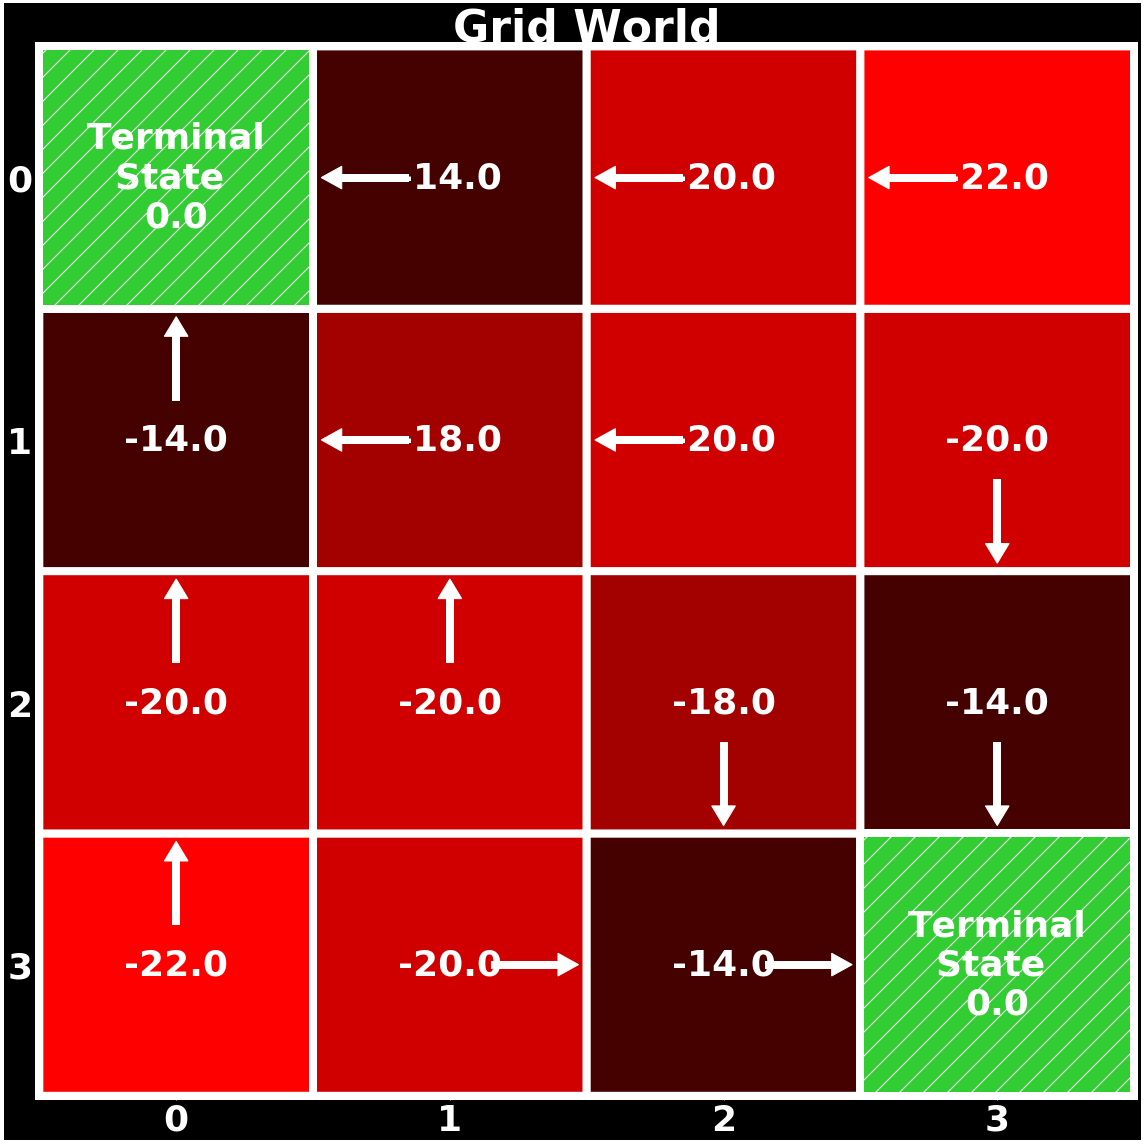

In [57]:
model_rl.iterative_policy_evaluation(mdp)

display = RL.GridDisplay(model_rl, mdp)
display.show_values(fig_name='policy_evaluation.png', save_fig=True)

# Policy Iteration

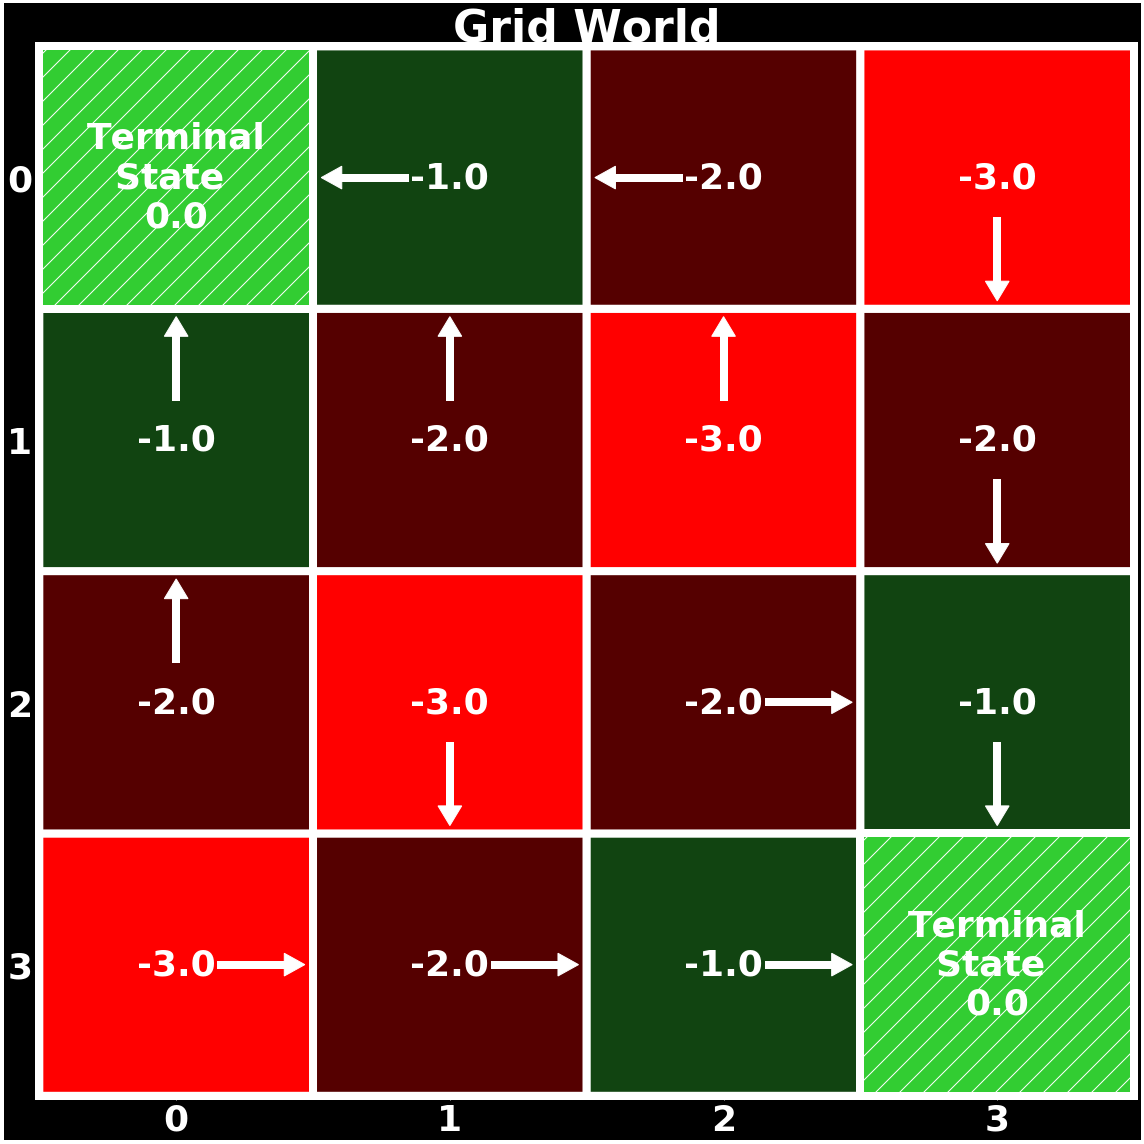

0.0


In [59]:
model_rl.policy_iteration(mdp)

display = RL.GridDisplay(model_rl, mdp)
display.show_values(fig_name='policy_iteration.png', save_fig=True)
v_error = model_rl.test_optimal_v(mdp)
print v_error.max()

# Value Iteration

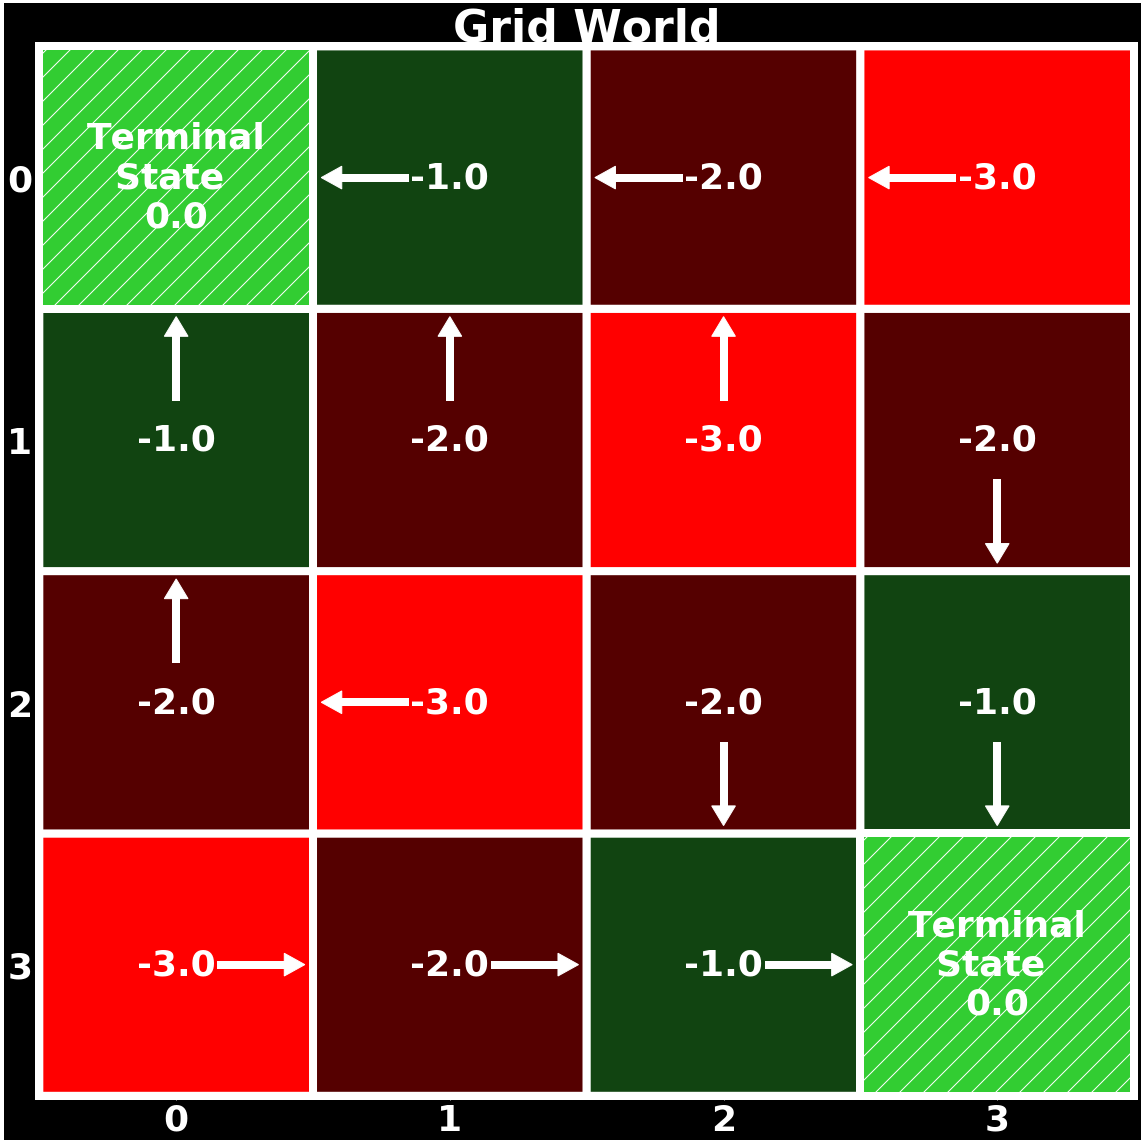

0.0


In [60]:
model_rl.value_iteration(mdp)

display = RL.GridDisplay(model_rl, mdp)
display.show_values(fig_name='value_iteration.png', save_fig=True)
q_error = model_rl.test_optimal_q(mdp)
v_error = model_rl.test_optimal_v(mdp)
print v_error.max()
print q_error.max()

# Q-Value Iteration

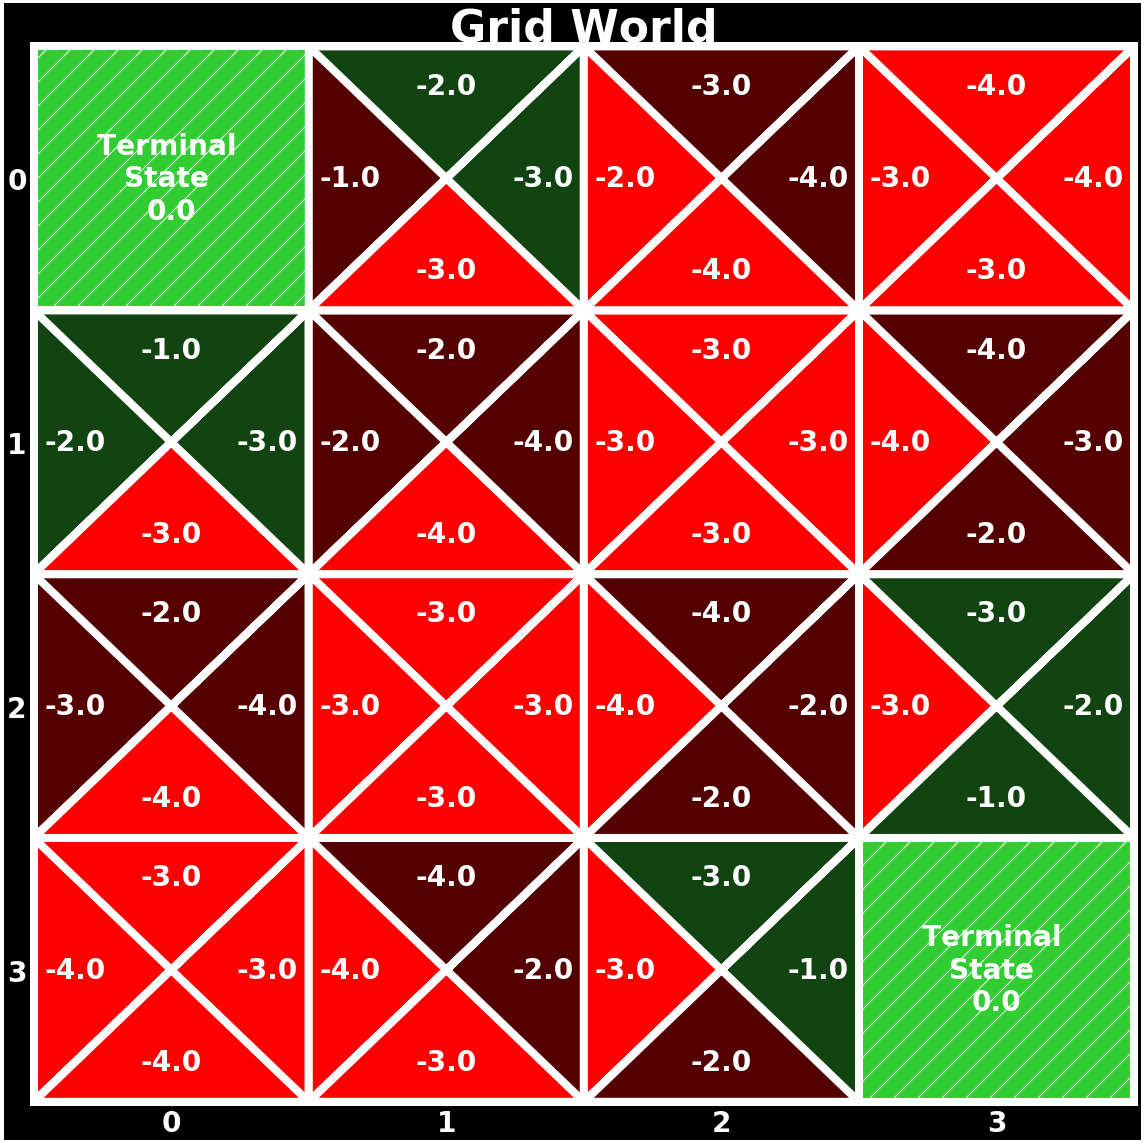

In [11]:
model_rl.q_value_iteration(mdp)

display = RL.GridDisplay(model_rl, mdp)
display.show_q_values(fig_name='q_value_iteration_simple.png', save_fig=True)
v_error = model_rl.test_optimal_v(mdp)
print v_error.max()

# Running Model Free Algorithms

In [12]:
model_free_rl = RL.ModelFreeRL(n=n, m=m, states=states, actions=actions, horizon=100)

# SARSA

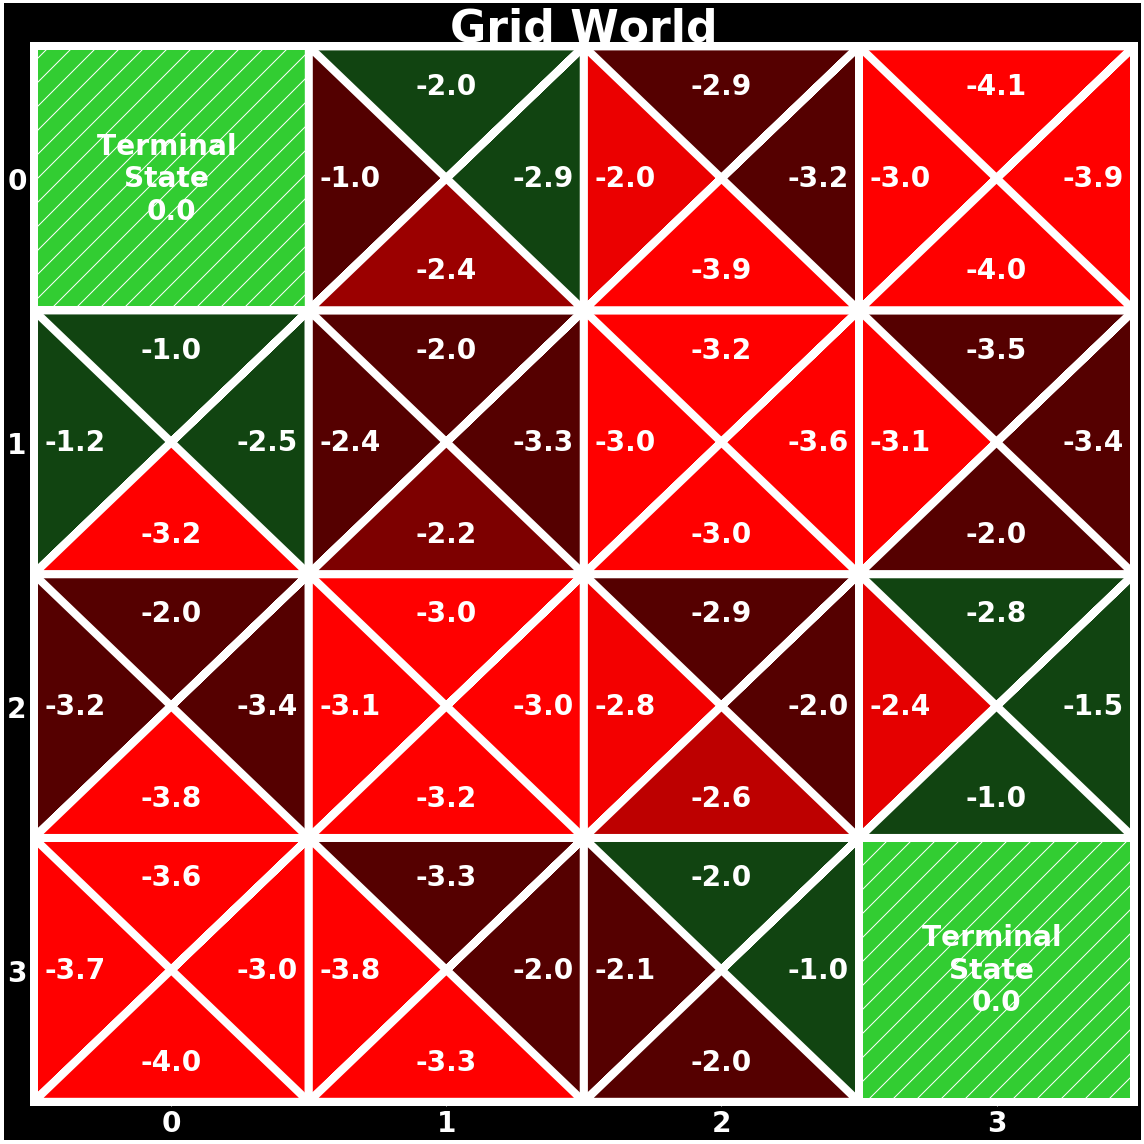

In [13]:
model_free_rl.sarsa(env)

display = RL.GridDisplay(model_free_rl, env)
display.show_q_values(fig_name='sarsa.png', save_fig=True)

# Plotting episode returns and parameters across episodes

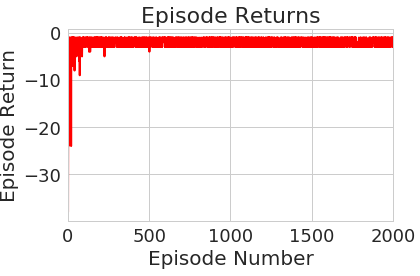

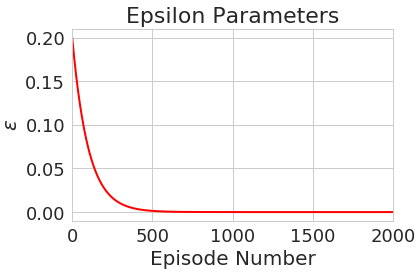

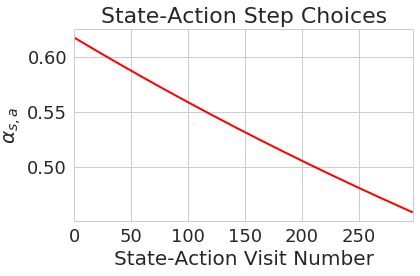

In [14]:
# Plotting the returns at each episode.
model_free_rl.plot_epsiode_returns()

# Plotting the epsilon parameters at each episode.
model_free_rl.plot_epsilon_parameters()

# Plotting the step size parameter for a state.
model_free_rl.plot_alpha_parameters(s=2, a=1)

# Q learning

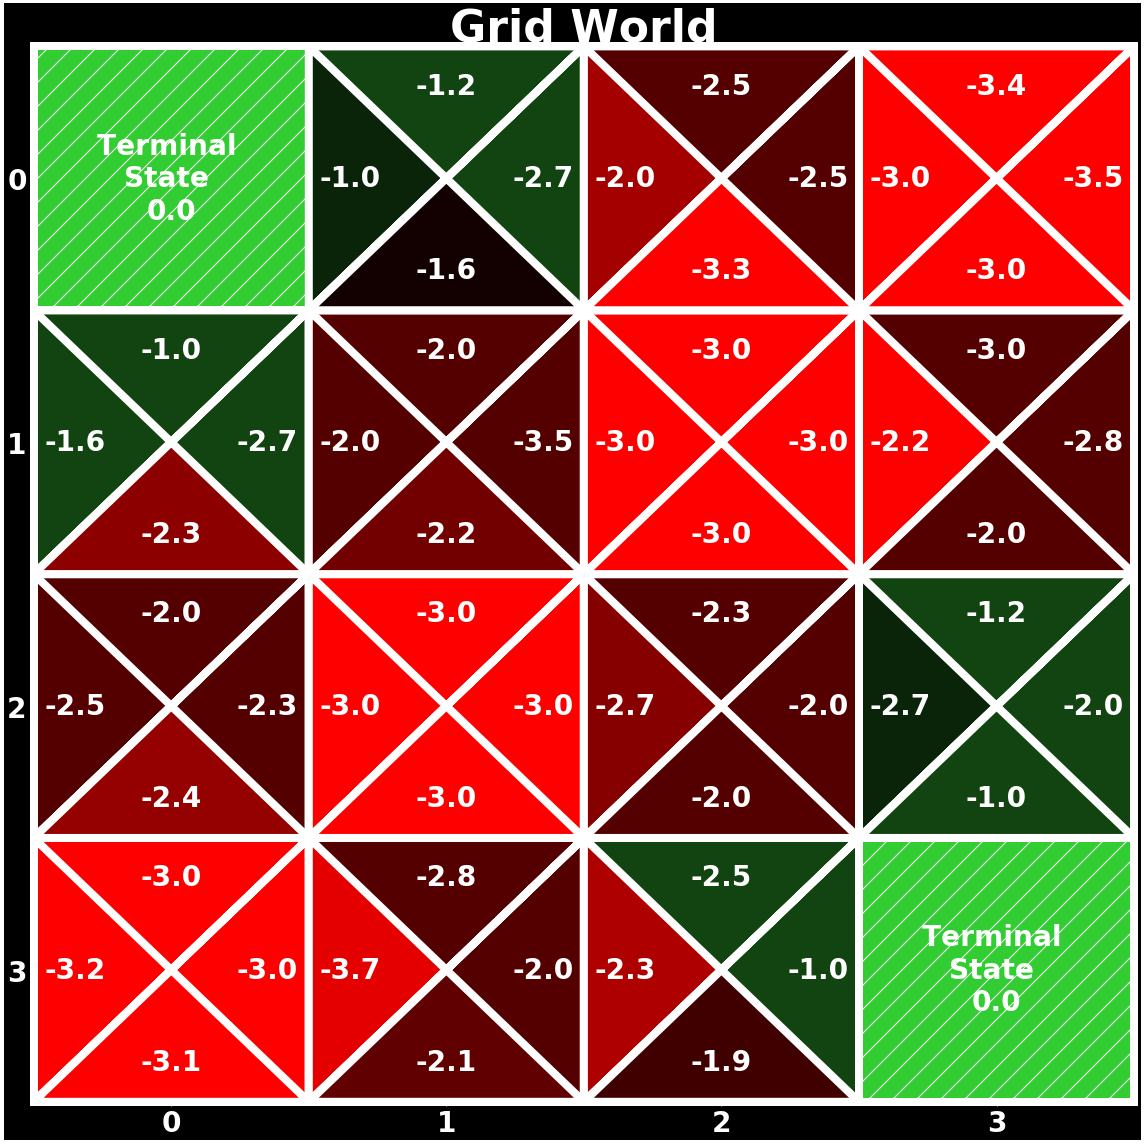

In [15]:
model_free_rl.q_learning(env)

display = RL.GridDisplay(model_free_rl, env)
display.show_q_values(fig_name='q_learning_simple.png', save_fig=True)

# One-Step Temporal Difference

# Evaluating the value function for the optimal policy learned using one step TD.

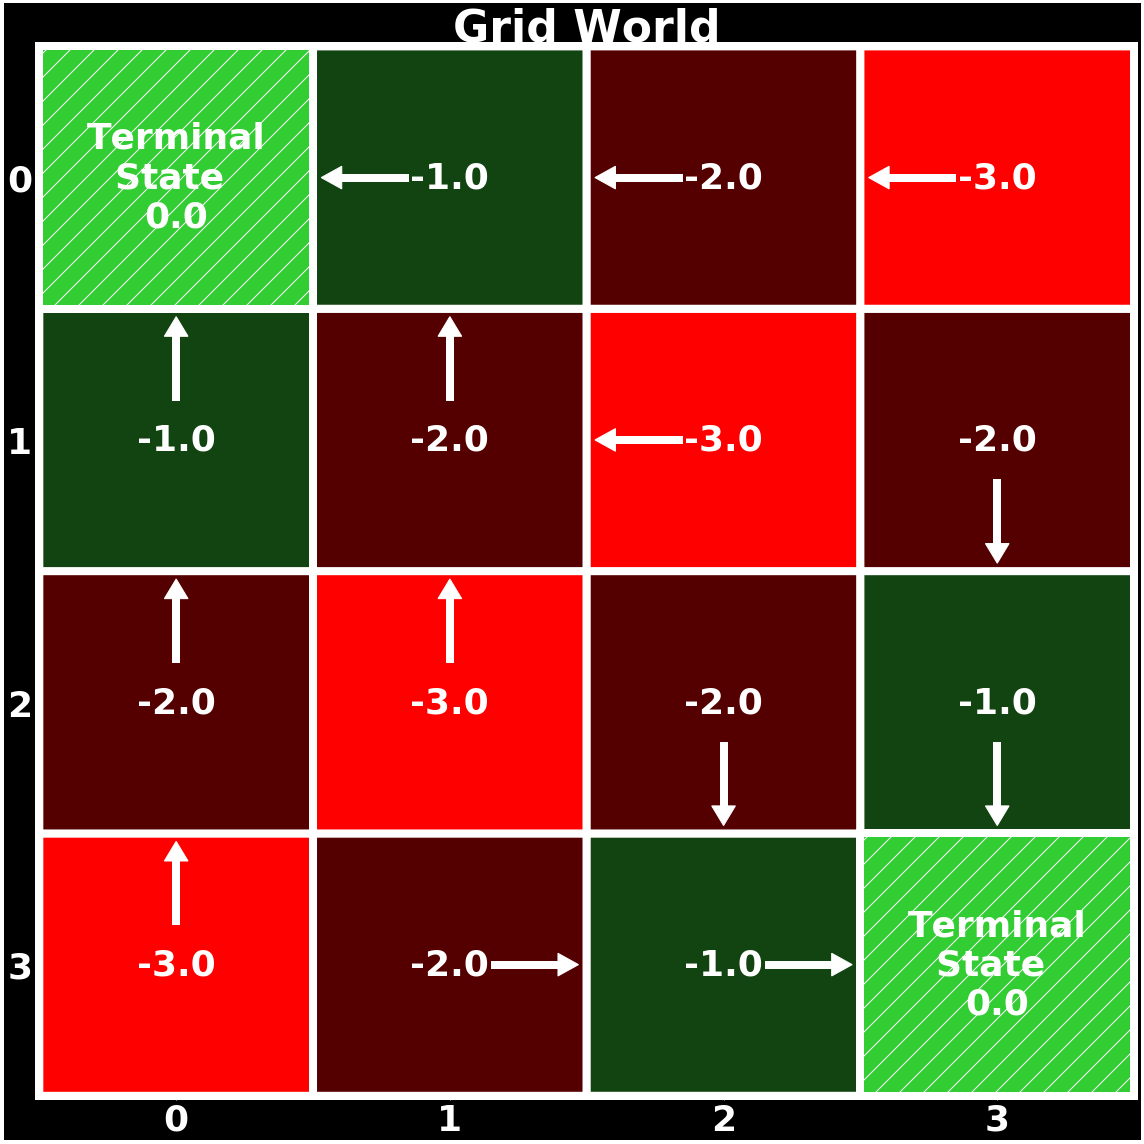

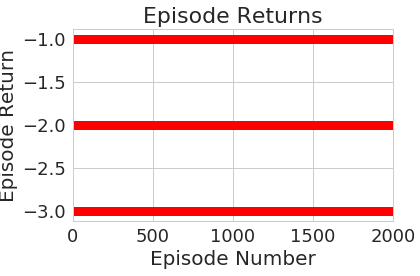

In [16]:
model_free_rl.one_step_temporal_difference(env)

display = RL.GridDisplay(model_free_rl, env)
display.show_values(fig_name='one_step_td.png', save_fig=True)

# Plotting the returns at each episode.
model_free_rl.scatter_epsiode_returns()

# Creating grid world environment

In [41]:
grid_rows = 5
grid_cols = 8
num_actions = 8
living_rewards = .1
terminal_states = [0, 8, 16, 18, 21, 24, 26]
terminal_rewards = {0:-1, 8:1, 16:-1, 18:-1, 21:-1, 24:-1, 26:-1}

env = RL.GridWorldEnv(grid_rows, grid_cols, num_actions, terminal_states, 
                      terminal_rewards, prob_noise=.01, 
                      living_rewards=living_rewards, reward_into=True, 
                      initial_state=33)

n = env.n
m = env.m
states = env.states
actions = env.actions

# Creating model free instance to run algorithms

In [48]:
# Created instance of class to run model free based algorithms.
model_free_rl = RL.ModelFreeRL(n=n, m=m, states=states, actions=actions, alpha=.6,
                               alpha_decay=True, alpha_decay_param=.01, 
                               gamma=.95, num_episodes=5000, 
                               epsilon=.2, horizon=100, epsilon_decay=True, 
                               epsilon_decay_param=.001)

# Q-Learning

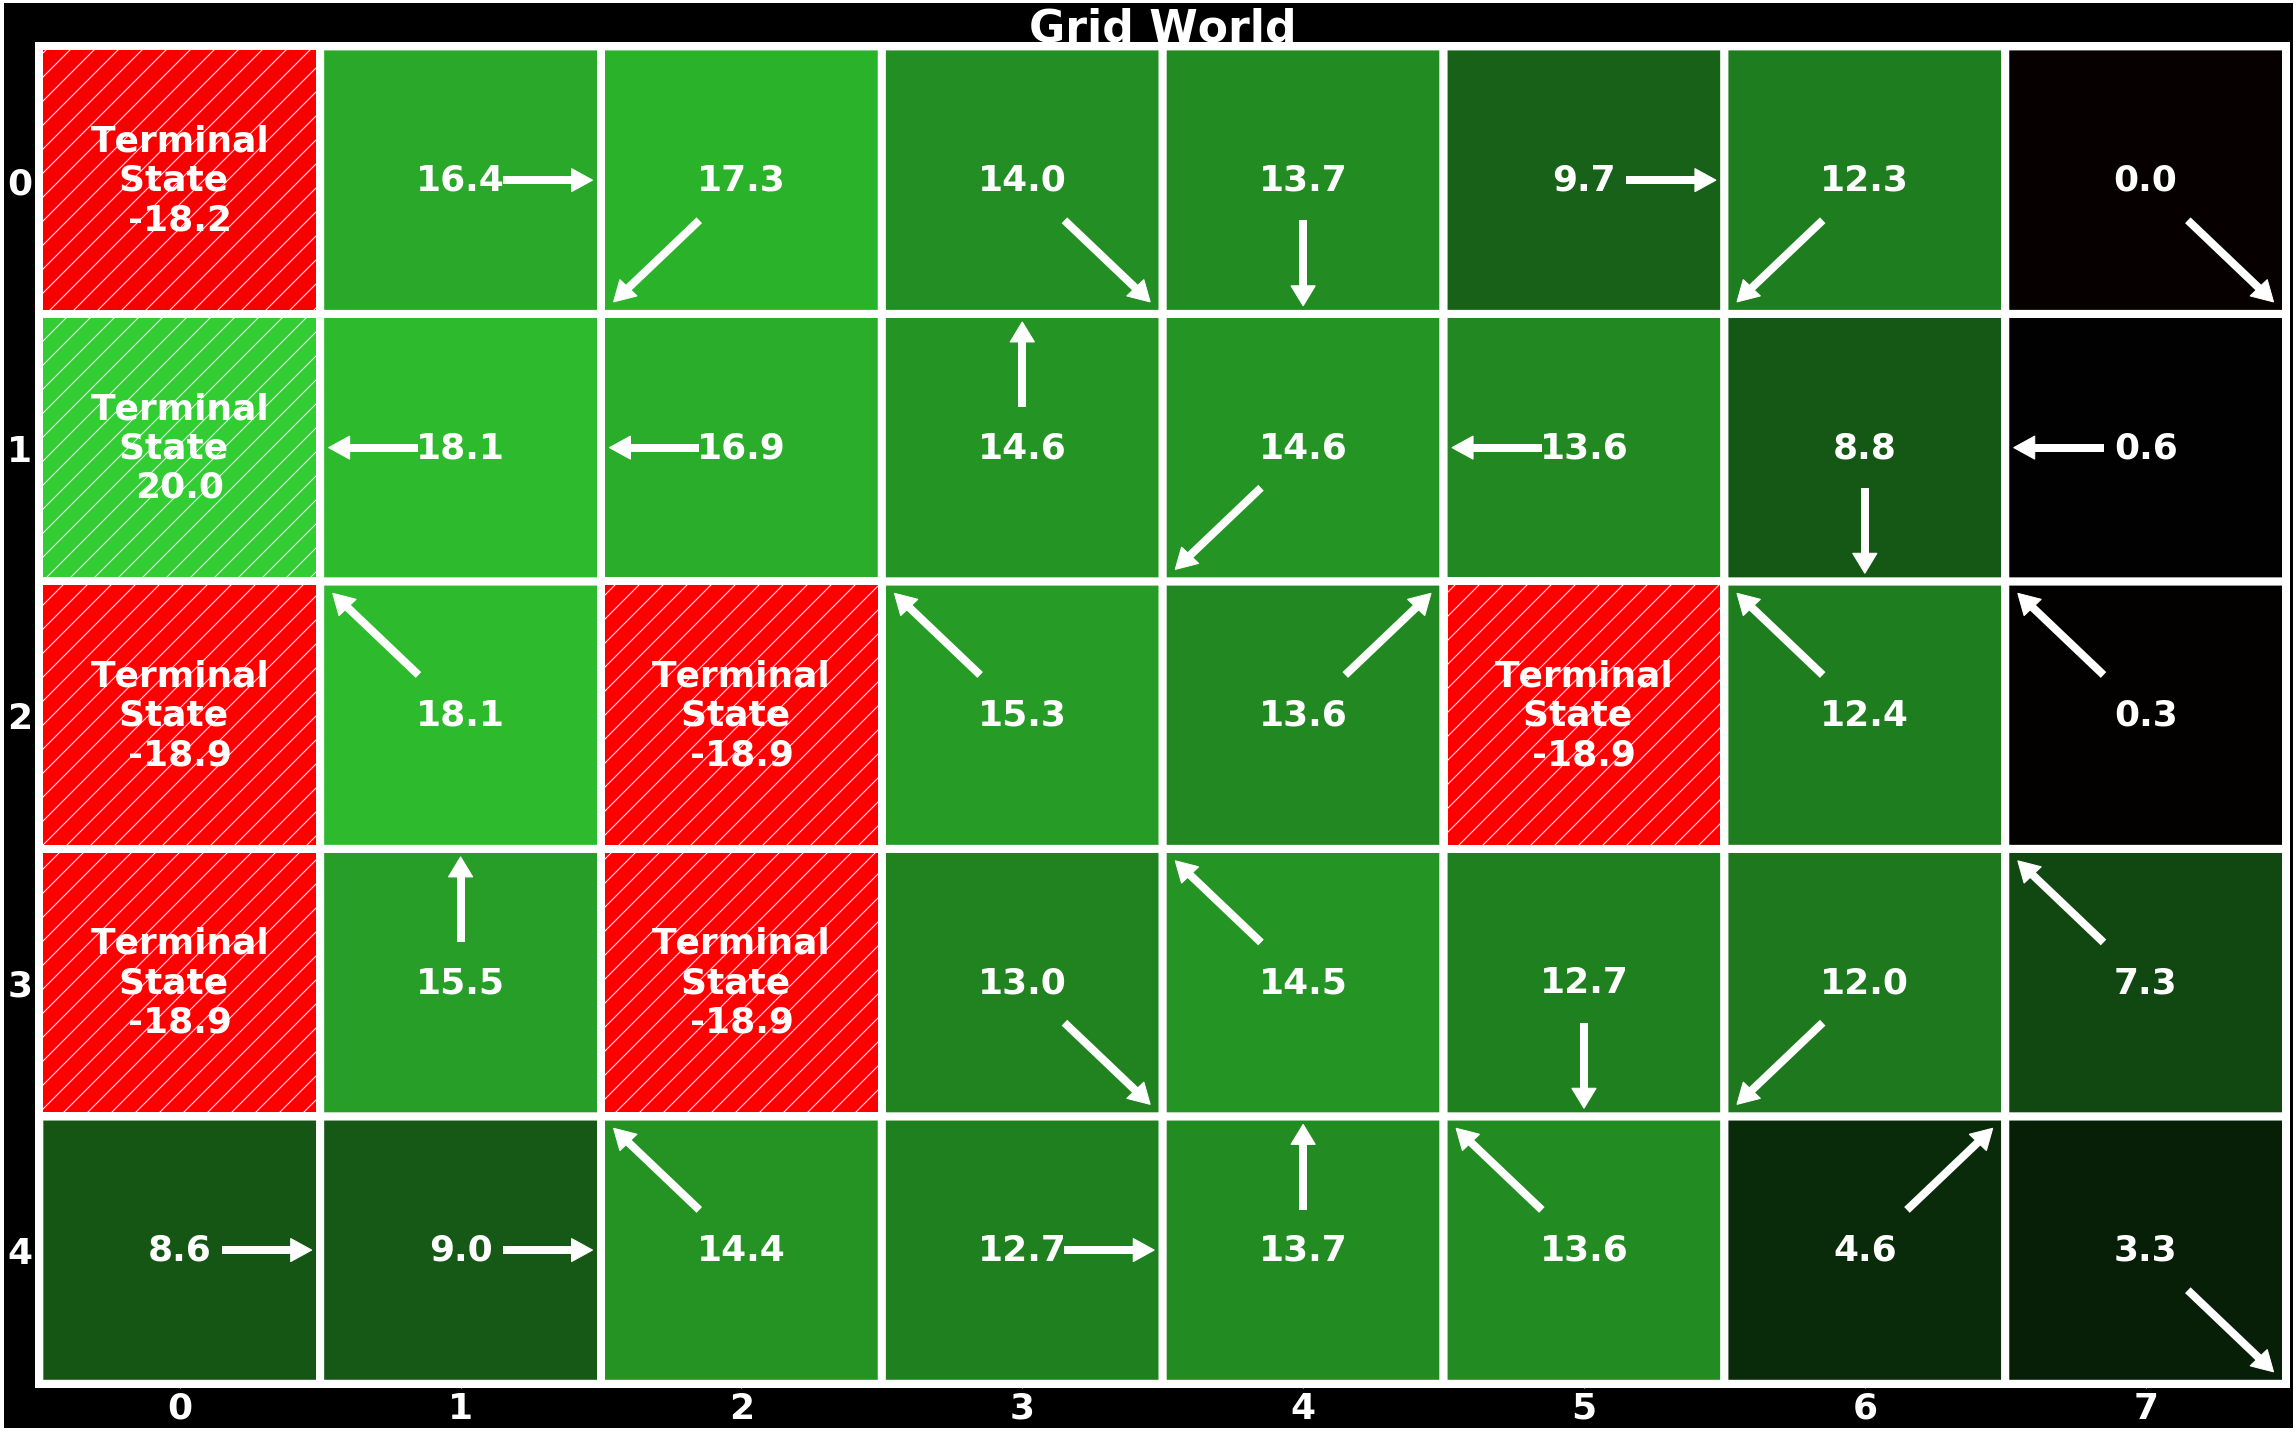

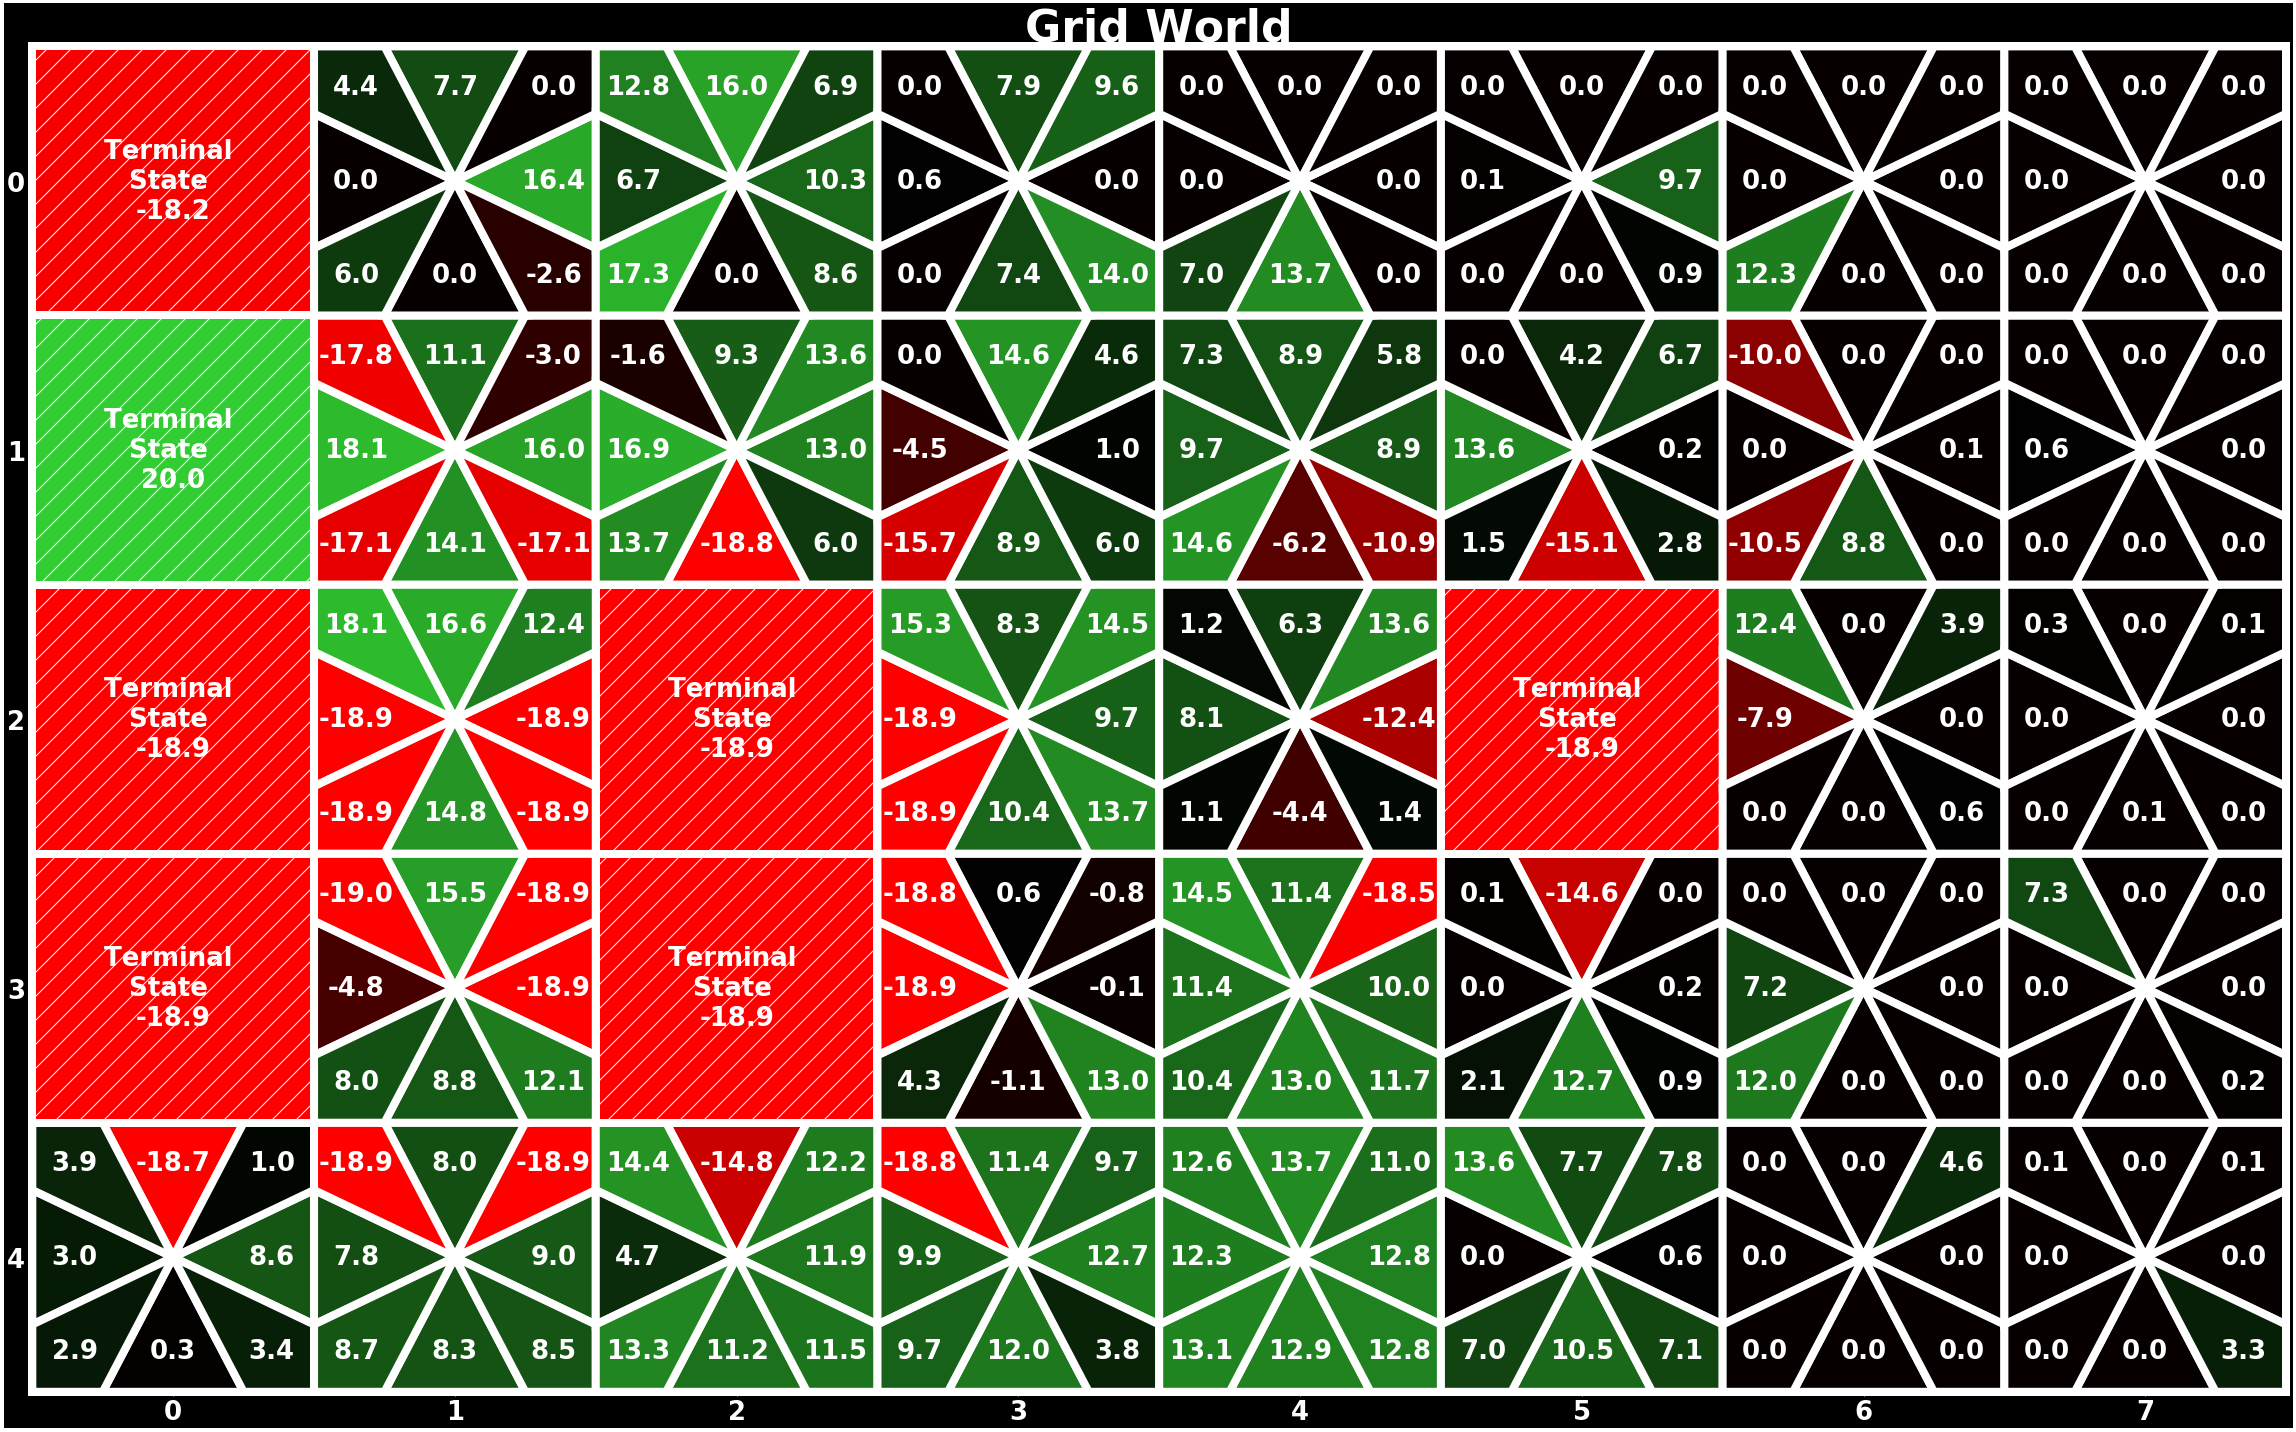

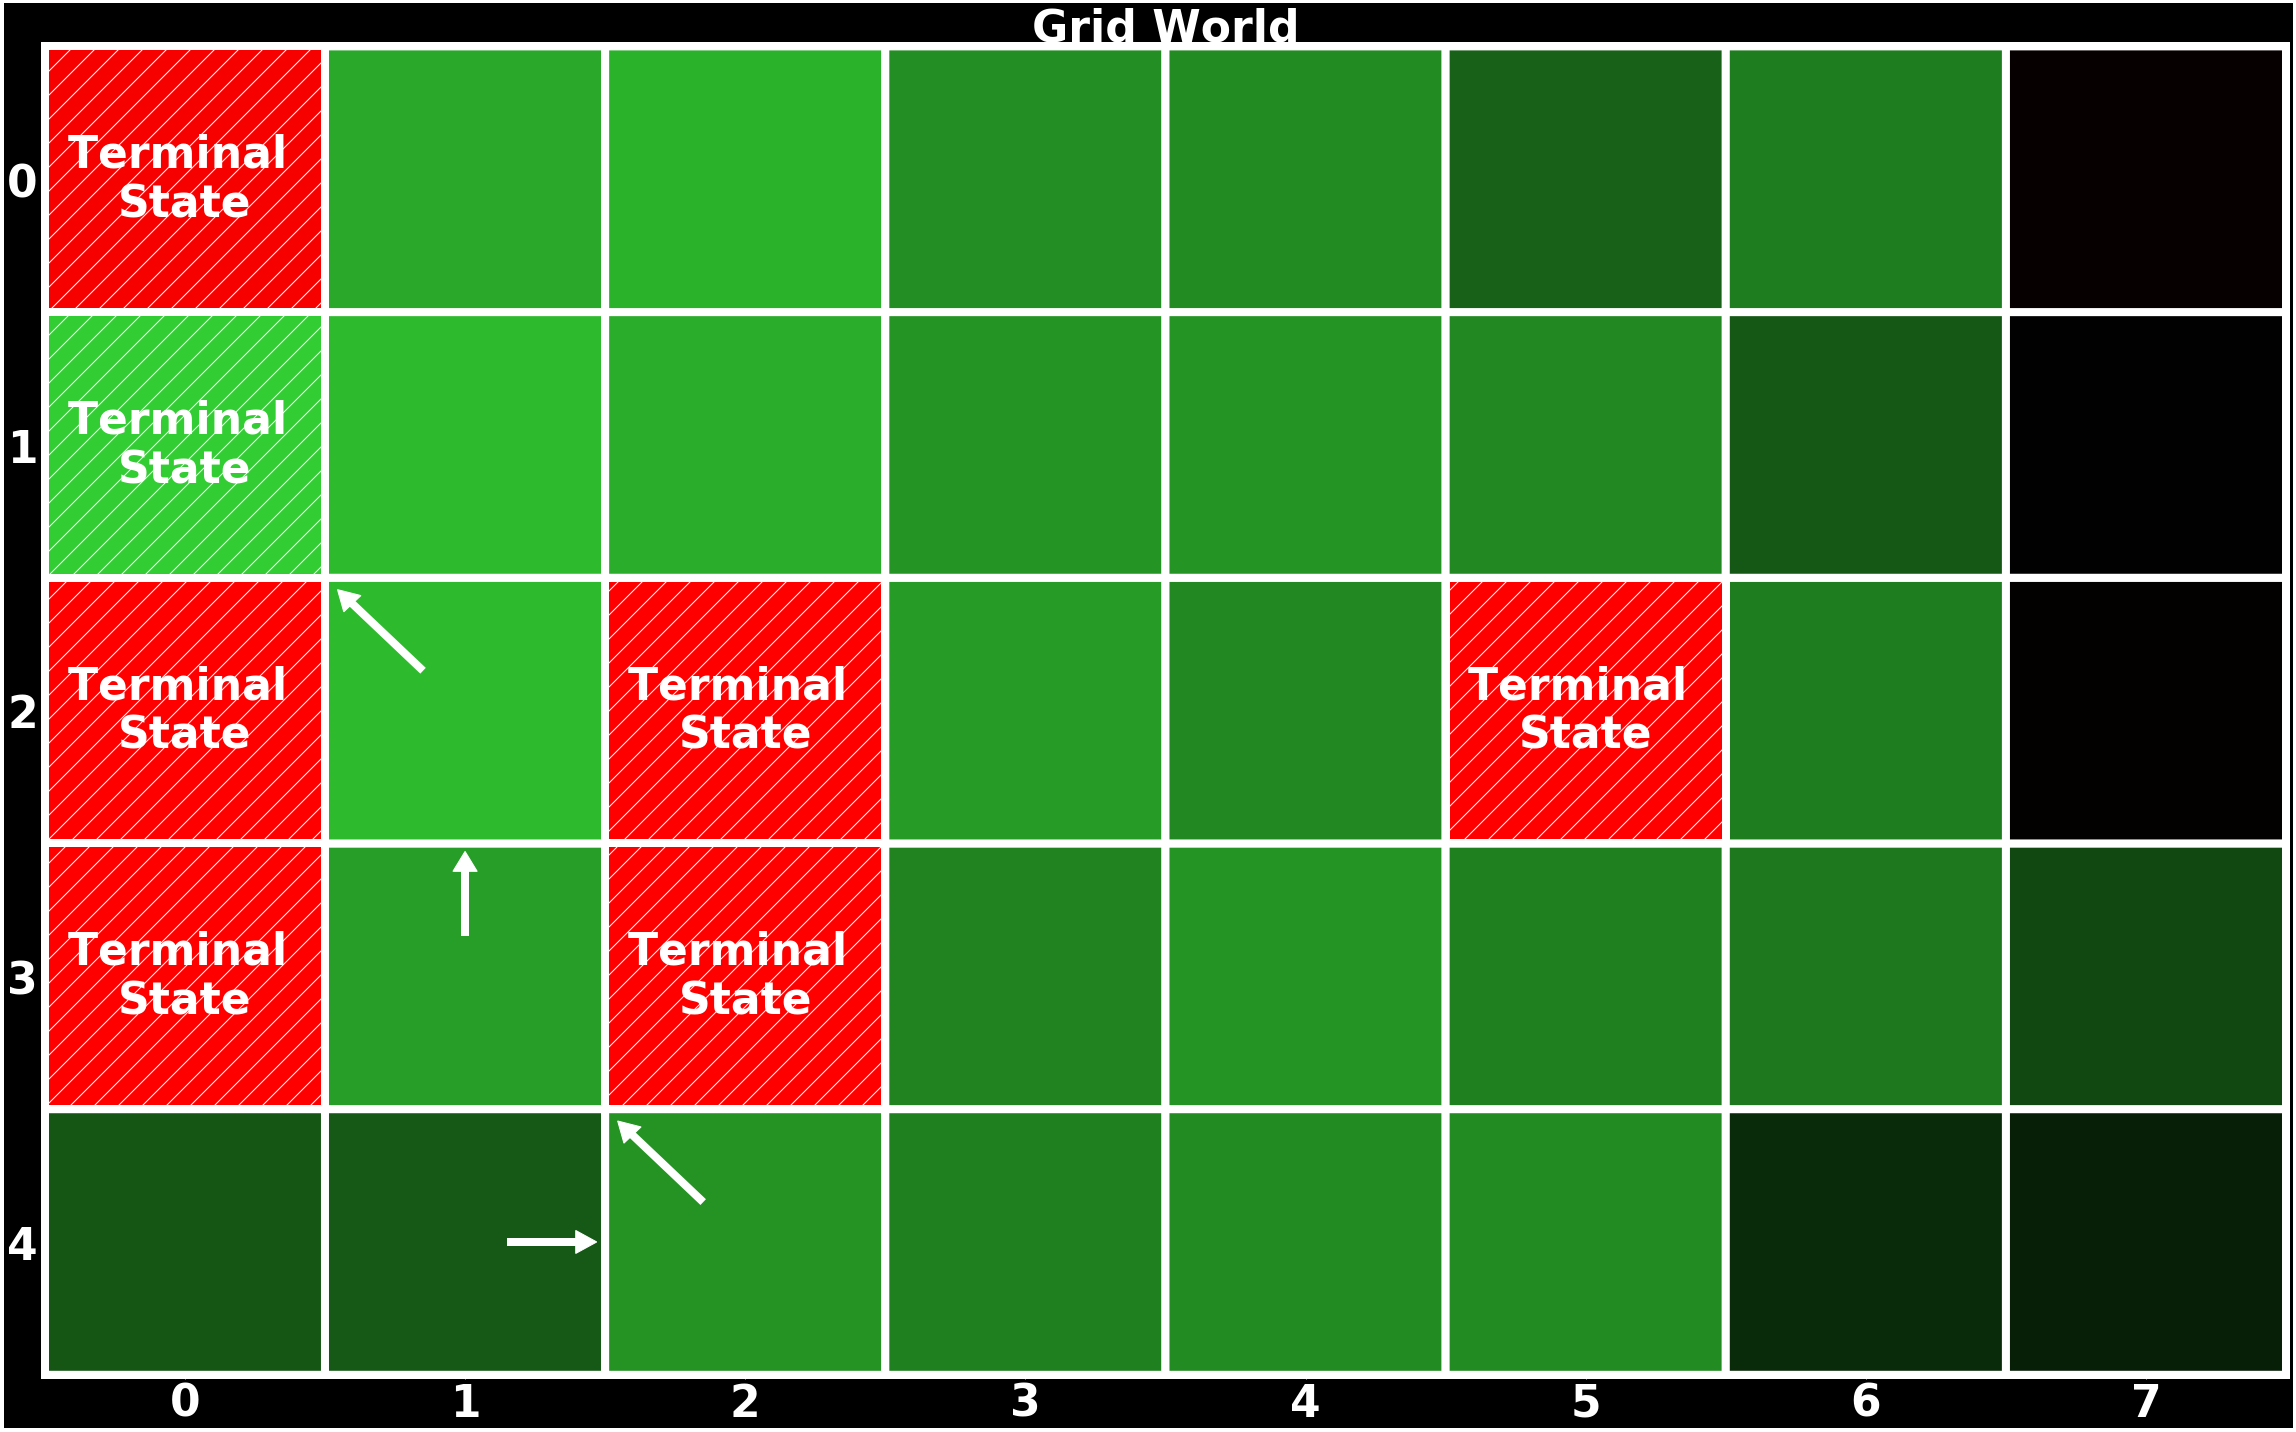

In [49]:
model_free_rl.q_learning(env)

display = RL.GridDisplay(model_free_rl, env)
display.show_values(fig_name='values.png', save_fig=True)
display.show_q_values(fig_name='q_values.png', save_fig=True)
show_states = env.get_policy_path(model_free_rl, start_state=33)
display.show_policy(show_states, fig_name='policy.png', save_fig=True)

In [50]:
q_error = model_free_rl.test_optimal_q(env)
v_error = model_free_rl.test_optimal_v(env)
print v_error.max()
print q_error.mean()

11.0977796933
4.49510538686


# Plotting episode returns and parameters across episodes

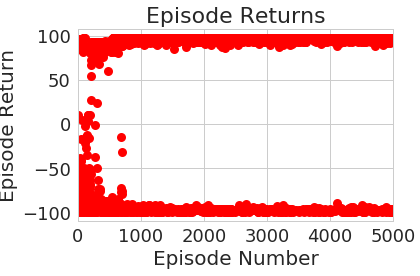

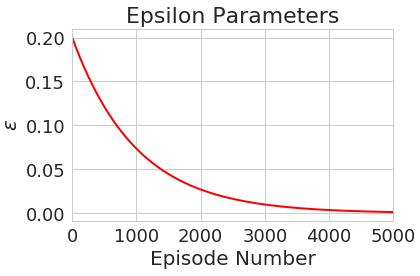

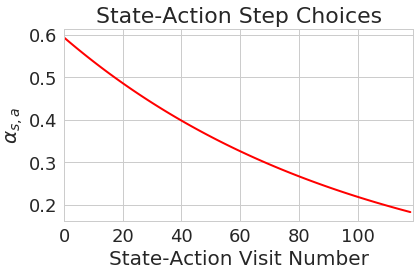

In [51]:
# Plotting the returns at each episode.
model_free_rl.scatter_epsiode_returns()

# Plotting the epsilon parameters at each episode.
model_free_rl.plot_epsilon_parameters()

# Plotting the step size parameter for a state.
model_free_rl.plot_alpha_parameters(s=33, a=0)

# Creating model based instance to run algorithms

In [36]:
# Created instance of class to run model based algorithms.
model_rl = RL.ModelBasedRL(max_eval=1000, gamma=.95)
mdp = RL.GridWorldMDP(grid_rows, grid_cols, num_actions, terminal_states, 
                      terminal_rewards, prob_noise=.01, 
                      living_rewards=living_rewards, reward_into=True)
start_state = 33

# Q-Value Iteration

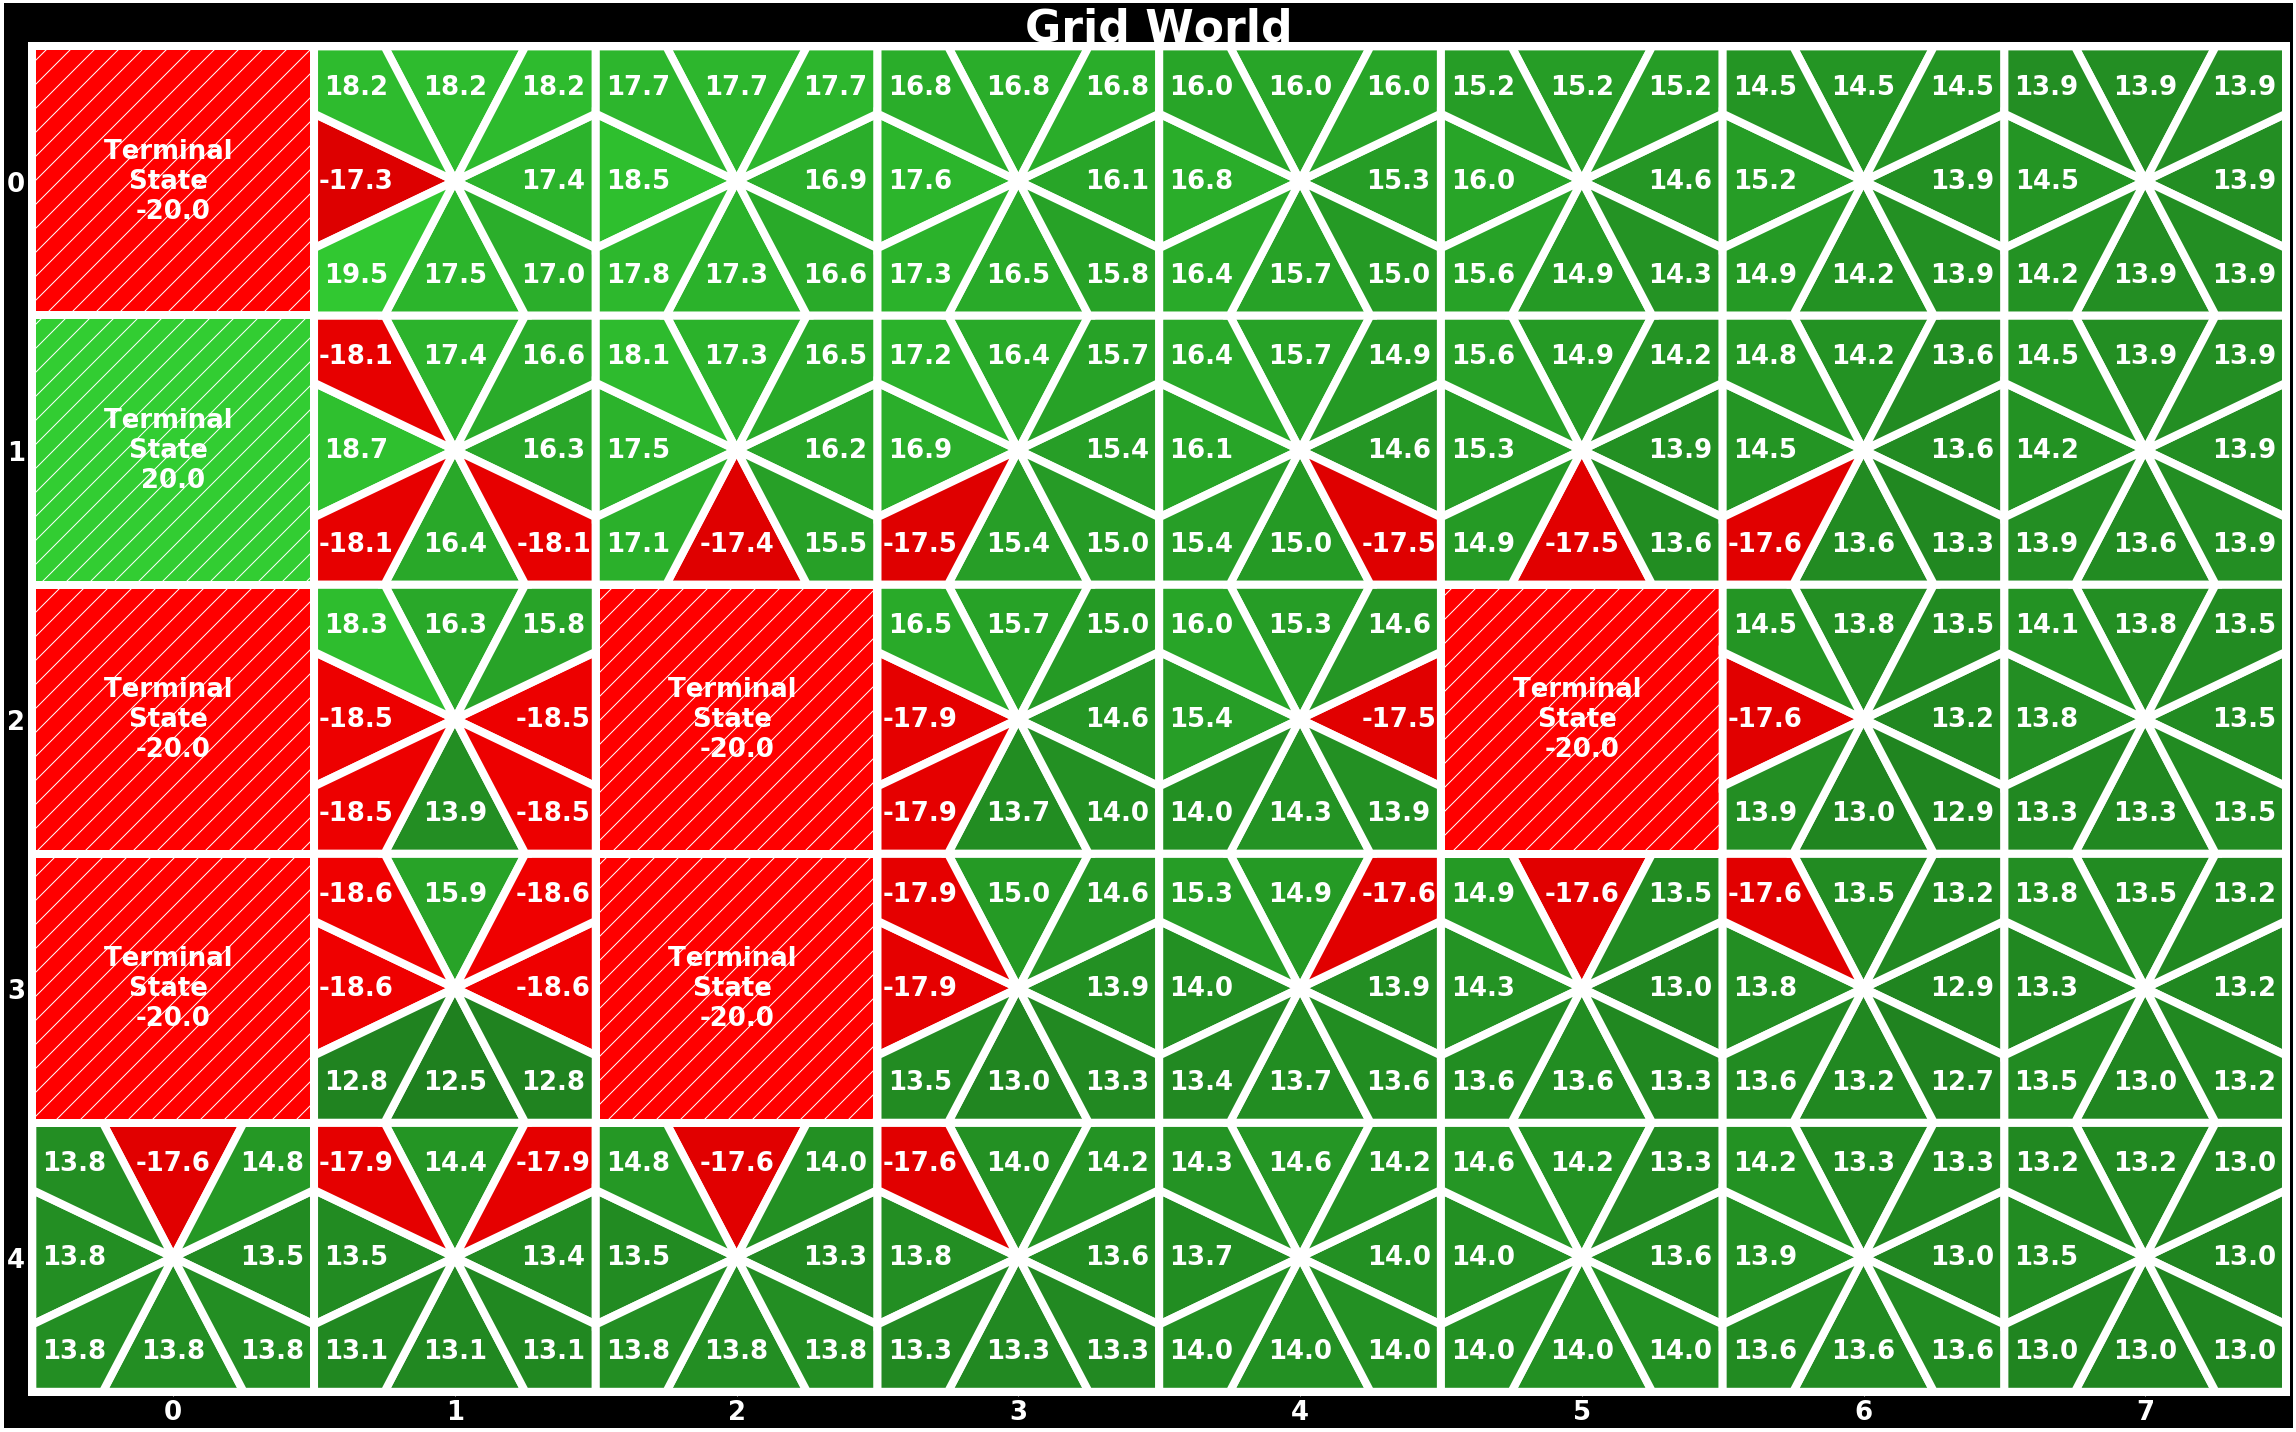

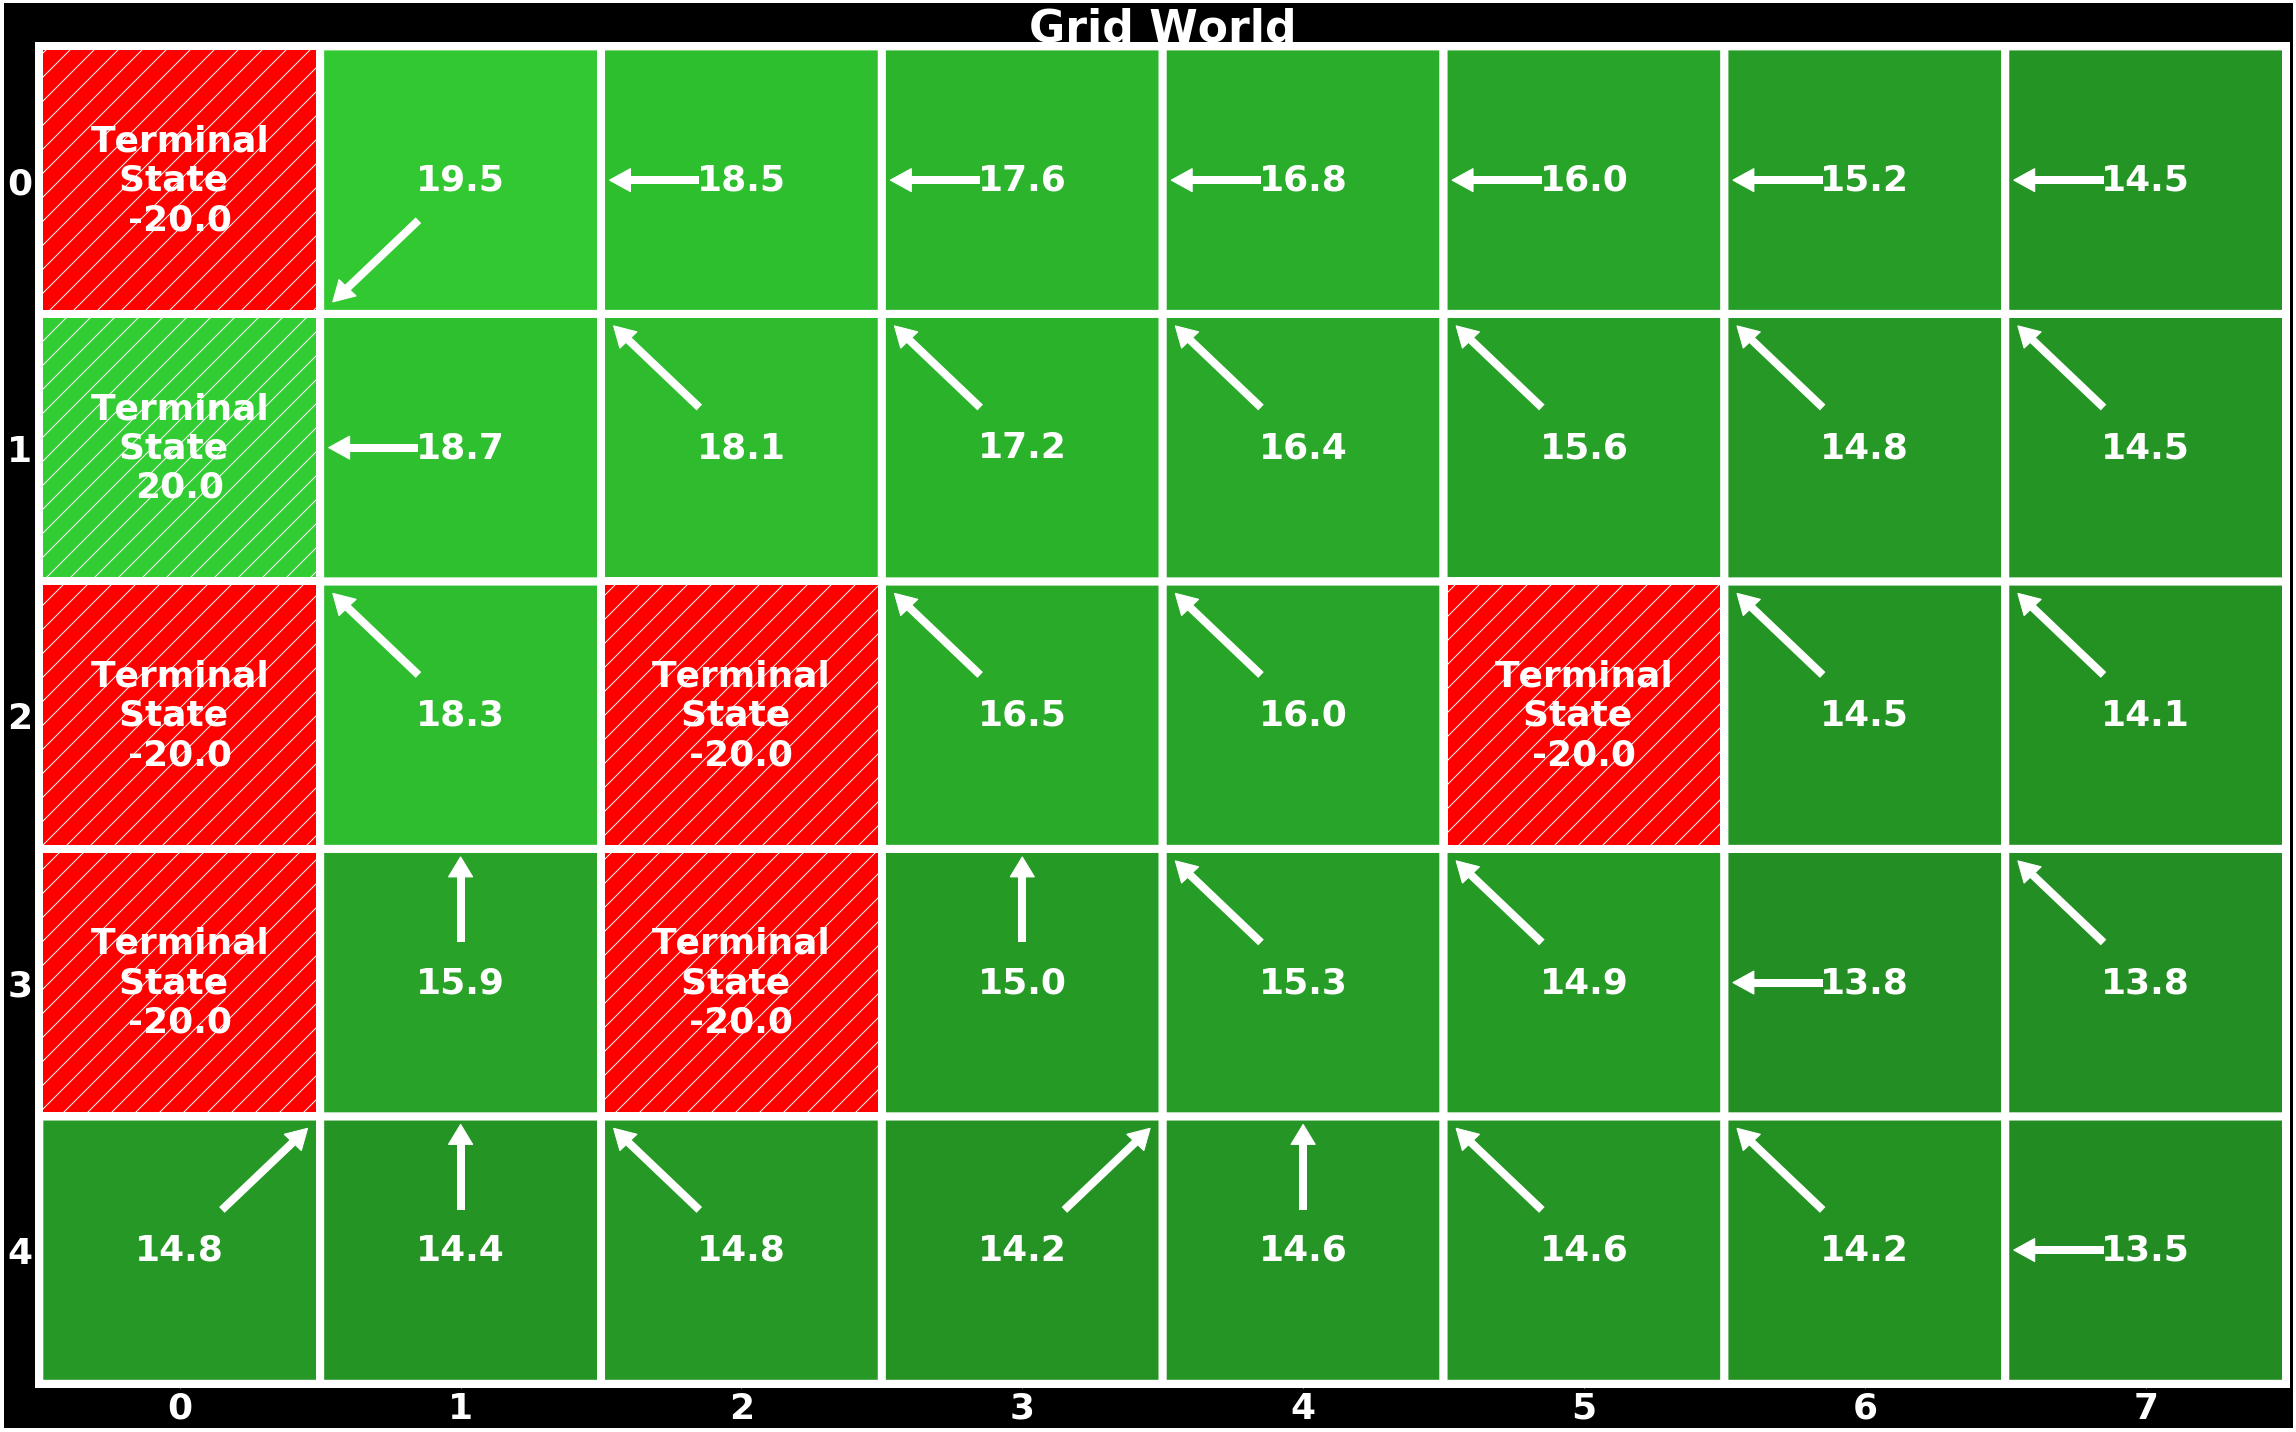

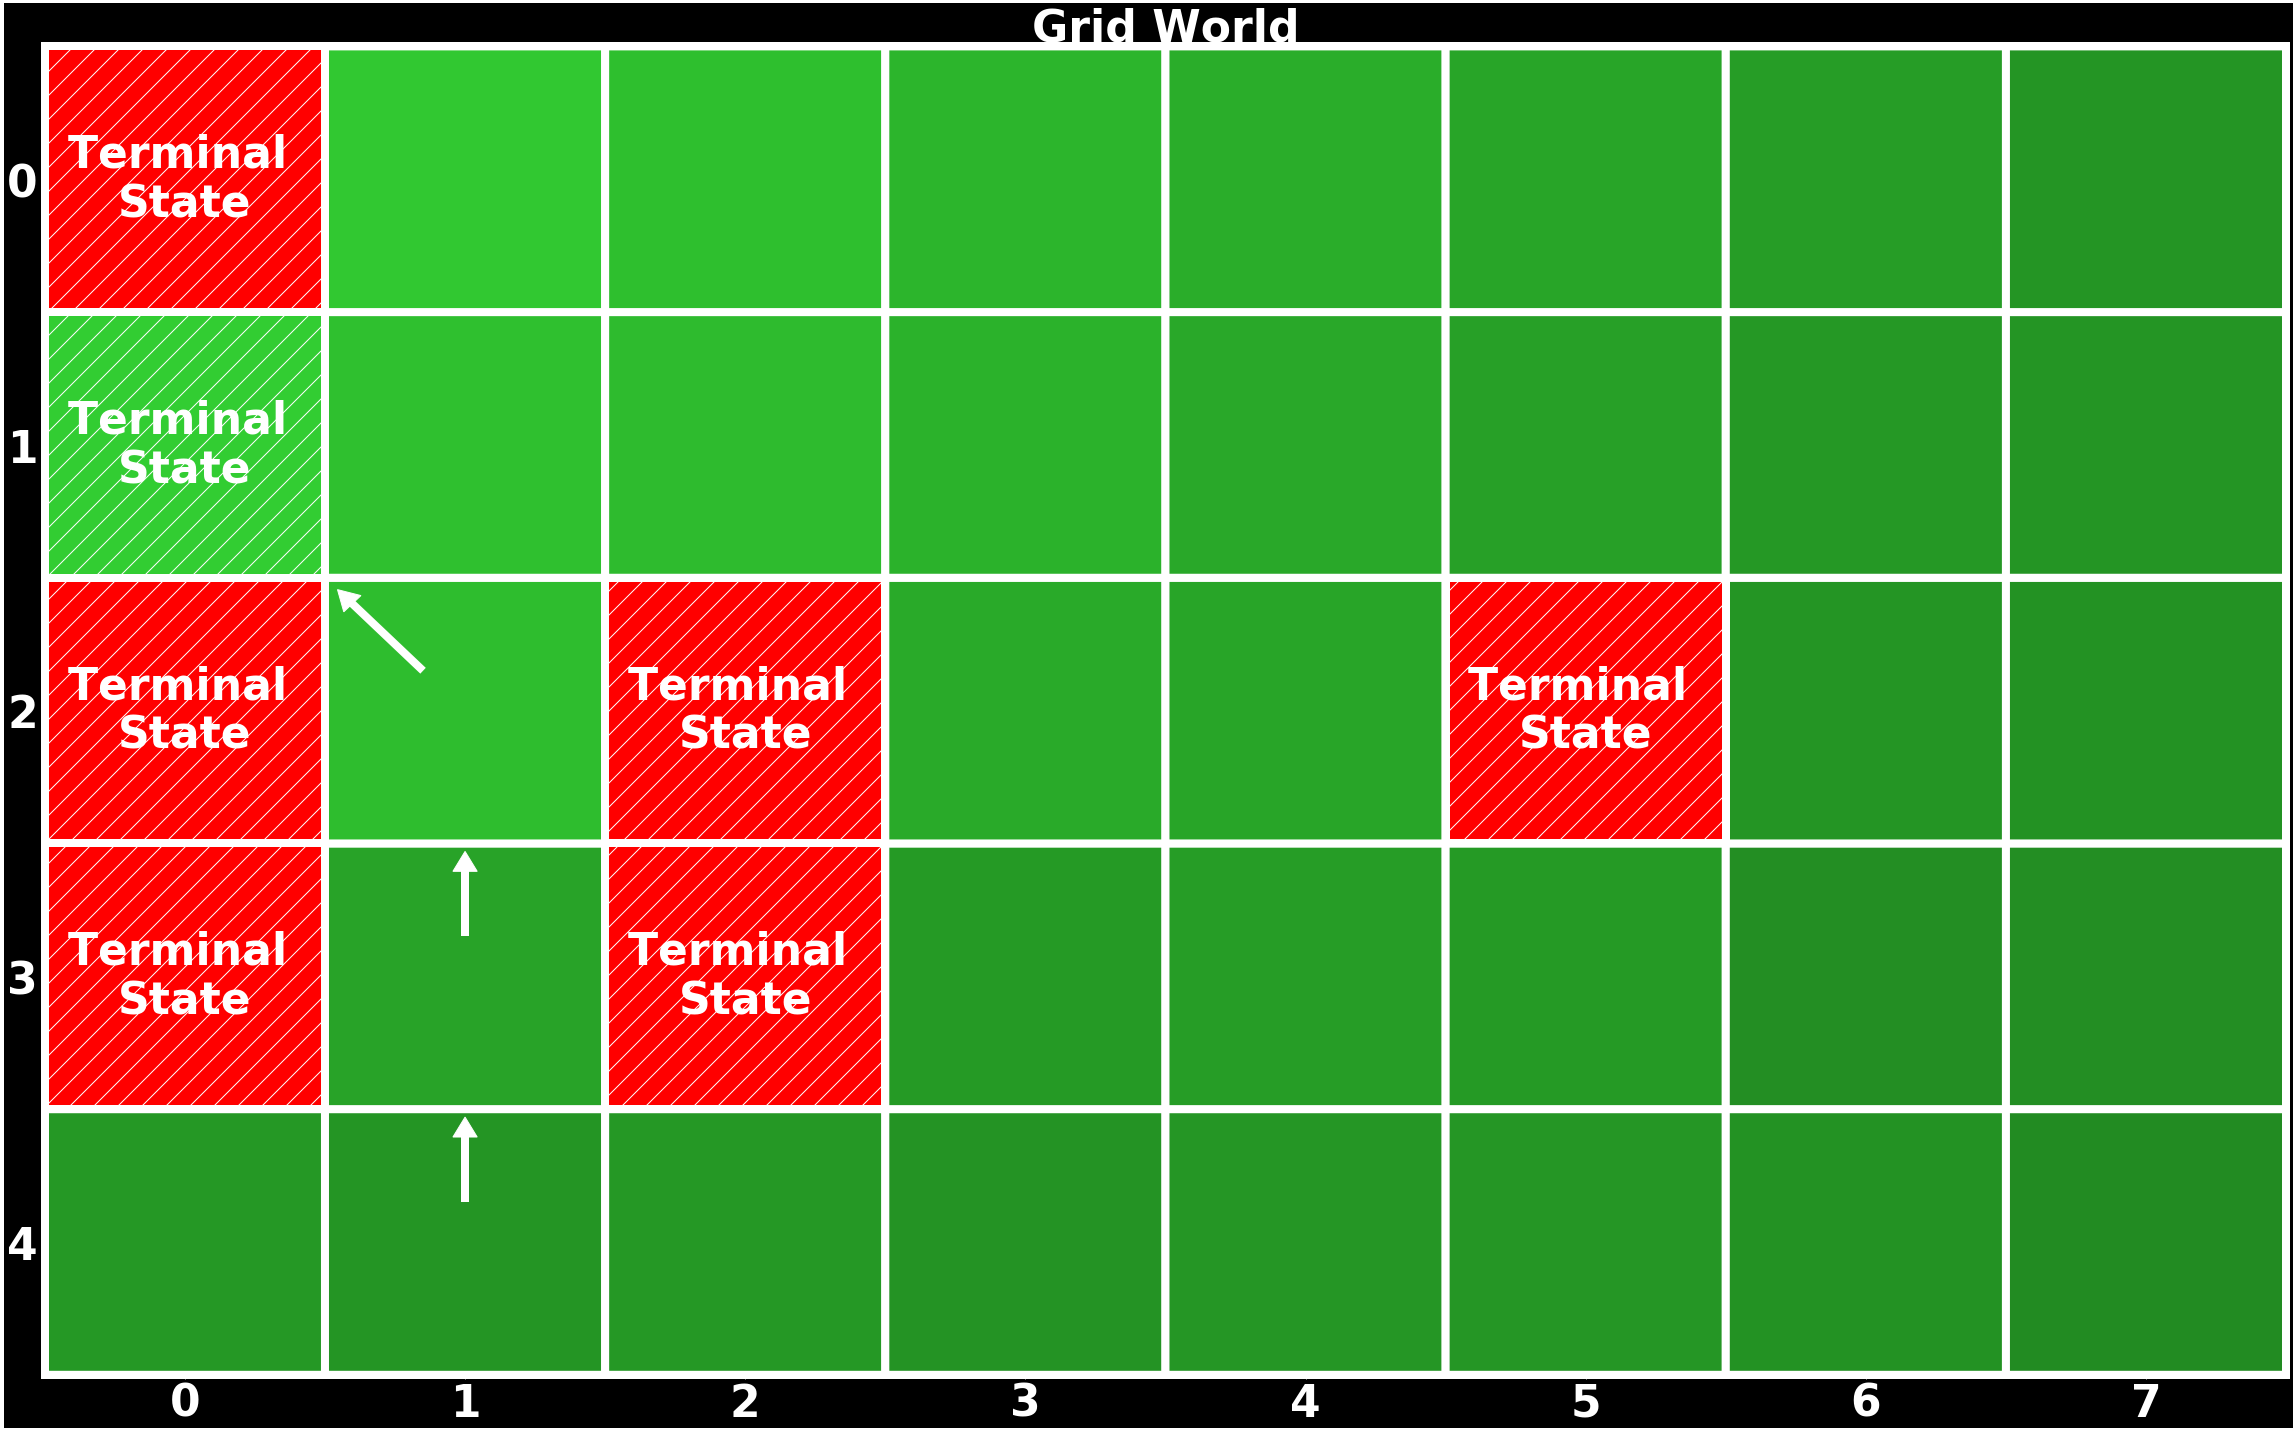

In [37]:
model_rl.q_value_iteration(mdp)

display = RL.GridDisplay(model_rl, mdp)

display.show_q_values(fig_name='q_iter_q_values.png', save_fig=True)
display.show_values(fig_name='q_iter_values.png', save_fig=True)
show_states = mdp.get_policy_path(model_rl, start_state)
display.show_policy(show_states, fig_name='q_iter_policy.png', save_fig=True)

In [38]:
q_error = model_rl.test_optimal_q(mdp)
v_error = model_rl.test_optimal_v(mdp)
print v_error.max()
print q_error.max()

9.28907687978e-05
9.28907687978e-05


# Risk Sensitive Reinforcement Learning

In [39]:
max_eval = 10000
alpha = .01
tol = 1e-8

model_rl = RL.ModelBasedRL(max_eval=max_eval, gamma=.95)

# Prospect Agents

In [ ]:
agent_neutral = RL.ProspectAgent(ref=0, c_minus=1, c_plus=1, rho_minus=.5, rho_plus=.5)
agent_low = RL.ProspectAgent(ref=0, c_minus=7.5, c_plus=1, rho_minus=.5, rho_plus=.5)
agent_mid = RL.ProspectAgent(ref=0, c_minus=17.5, c_plus=1, rho_minus=.5, rho_plus=.5)
agent_high = RL.ProspectAgent(ref=0, c_minus=20, c_plus=1, rho_minus=.5, rho_plus=.5)

In [ ]:
agent_neutral.plot_value_function(title='Risk-Neutral Prospect', save_fig=True, fig_name='prospect_neutral')

agent_low.plot_value_function(title='Low Risk-Averse Prospect', save_fig=True, fig_name='prospect_low')

agent_mid.plot_value_function(title='Mid Risk-Averse Prospect', save_fig=True, fig_name='prospect_mid')

agent_high.plot_value_function(title='High Risk-Averse Prospect', save_fig=True, fig_name='prospect_high')

# Risk Neutral Agent

In [ ]:
model_rl.risk_q_contraction(mdp, agent_neutral, alpha=alpha, tol=tol, verbose=True)

display = RL.GridDisplay(model_rl, mdp)
display.show_q_values(fig_name='q_value_neutral.png', save_fig=True)
display.show_values(fig_name='value_neutral.png', save_fig=True)
show_states = mdp.get_policy_path(model_rl, start_state)
display.show_policy(show_states, fig_name='policy_neutral.png', save_fig=True)

error_neutral = model_rl.test_optimal_risk_q(mdp, agent_neutral)
print error_neutral.max(), error_neutral.mean()

# Low Risk Averse Agent

In [ ]:
model_rl.risk_q_contraction(mdp, agent_low, alpha=alpha, tol=tol, verbose=True)

display = RL.GridDisplay(model_rl, mdp)
display.show_q_values(fig_name='q_value_low.png', save_fig=True)
display.show_values(fig_name='value_low.png', save_fig=True)
show_states = mdp.get_policy_path(model_rl, start_state)
display.show_policy(show_states, fig_name='policy_low.png', save_fig=True)

error_low = model_rl.test_optimal_risk_q(mdp, agent_low)
print error_low.max(), error_low.mean()

# Mid Risk Averse Agent

In [ ]:
model_rl.risk_q_contraction(mdp, agent_mid, alpha=alpha, tol=tol, verbose=True)

display = RL.GridDisplay(model_rl, mdp)
display.show_q_values(fig_name='q_value_mid.png', save_fig=True)
display.show_values(fig_name='value_mid.png', save_fig=True)
show_states = mdp.get_policy_path(model_rl, start_state)
display.show_policy(show_states, fig_name='policy_mid.png', save_fig=True)

error_mid = model_rl.test_optimal_risk_q(mdp, agent_mid)
print error_mid.max(), error_mid.mean()

# High Risk Averse Agent

In [ ]:
model_rl.risk_q_contraction(mdp, agent_high, alpha=alpha, tol=tol, verbose=True)

display = RL.GridDisplay(model_rl, mdp)
display.show_q_values(fig_name='q_value_high.png', save_fig=True)
display.show_values(fig_name='value_high.png', save_fig=True)
show_states = mdp.get_policy_path(model_rl, start_state)
display.show_policy(show_states, fig_name='policy_high.png', save_fig=True)

error_high = model_rl.test_optimal_risk_q(mdp, agent_high)

print error_high.max(), error_high.mean()

# Creating New Grid MDP

In [ ]:
grid_rows = 4
grid_cols = 4
num_actions = 4
living_rewards = -.1
terminal_states = [5, 9, 10, 11, 12, 13, 14, 15]
terminal_rewards = {5:-1, 9:-1, 10:-1, 11:1, 12:1, 13:-1, 14:-1, 15:-1}

mdp = RL.GridWorldMDP(grid_rows, grid_cols, num_actions, terminal_states, 
                      terminal_rewards, prob_noise=.1, 
                      living_rewards=living_rewards)
start_state = 0

In [ ]:
entropic_high.u(11)

# Entropic Agents

In [ ]:
entropic_low = RL.EntropicAgent(ref=0, lamb=-.1)
entropic_high = RL.EntropicAgent(ref=0, lamb=.1)

In [ ]:
entropic_low.plot_value_function(title='Risk-Averse Entropic', save_fig=True, fig_name='entropic_low', type_val=1)
entropic_high.plot_value_function(title='Risk-Seeking Entropic', save_fig=True, fig_name='entropic_high', type_val=1)

# Entropic Risk-Averse

In [ ]:
model_rl.risk_q_contraction(mdp, entropic_low, alpha=alpha, tol=tol, verbose=True)

display = RL.GridDisplay(model_rl, mdp)
display.show_q_values(fig_name='entropic_q_value_low.png', save_fig=True)
display.show_values(fig_name='entropic_value_low.png', save_fig=True)
show_states = mdp.get_policy_path(model_rl, start_state)
display.show_policy(show_states, fig_name='entropic_policy_low.png', save_fig=True)

error_low = model_rl.test_optimal_risk_q(mdp, entropic_low)
print error_low.max(), error_low.mean()

# Entropic Risk Seeking

In [ ]:
model_rl.risk_q_contraction(mdp, entropic_high, alpha=alpha, tol=tol, verbose=True)

display = RL.GridDisplay(model_rl, mdp)
display.show_q_values(fig_name='entropic_q_value_high.png', save_fig=True)
display.show_values(fig_name='entropic_value_high.png', save_fig=True)
show_states = mdp.get_policy_path(model_rl, start_state)
display.show_policy(show_states, fig_name='entropic_policy_high.png', save_fig=True)

error_high = model_rl.test_optimal_risk_q(mdp, entropic_high)
print error_high.max(), error_high.mean()